In [1]:
from nilmtk import DataSet

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from __future__ import print_function, division
import time
from nilmtk import DataSet, TimeFrame, MeterGroup, HDFDataStore
import nilmtk.utils
redd = DataSet('/Users/evangelosgeraridis/Desktop/redd.h5')

# Select a house from the dataset (e.g., House 1)
first_building = redd.buildings[1]
train = DataSet('/Users/evangelosgeraridis/Desktop/redd.h5')
test = DataSet('/Users/evangelosgeraridis/Desktop/redd.h5')
# Let us see now what dates are recorded in the building 1 subdataset from redd


building_instance = 1  # Specify the building instance you want to work with

# Access the elec object for the specified building instance
elec = redd.buildings[building_instance].elec

# Get the available timeframe
timeframe = elec.get_timeframe()

# Print the start and end timestamps to see the available dates for building 1 
start_time = timeframe.start.strftime("%Y-%m-%d %H:%M:%S")
end_time = timeframe.end.strftime("%Y-%m-%d %H:%M:%S")
print(f"Start time: {start_time}, End time: {end_time}")

Start time: 2011-04-18 09:22:09, End time: 2011-05-24 15:57:02


In [2]:
train_elec = train.buildings[1].elec
test_elec = test.buildings[1].elec

# let us selct the top 5 most signifficatnt/ frequent devices 

top_5_train_elec = train_elec.submeters().select_top_k(k=5)

2/16 ElecMeter(instance=6, building=1, dataset='REDD', appliances=[Appliance(type='dish washer', instance=1)])

/Users/evangelosgeraridis/nilmtk/results.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._data = self._data.append(row, verify_integrity=True, sort=False)
/Users/evangelosgeraridis/nilmtk/results.py:108: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._data = self._data.append(new_result._data, sort=False)
/Users/evangelosgeraridis/nilmtk/elecmeter.py:742: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.Series(res[ac_types], index=ac_types)


3/16 ElecMeter(instance=7, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=1)])

/Users/evangelosgeraridis/nilmtk/results.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._data = self._data.append(row, verify_integrity=True, sort=False)
/Users/evangelosgeraridis/nilmtk/results.py:108: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._data = self._data.append(new_result._data, sort=False)
/Users/evangelosgeraridis/nilmtk/elecmeter.py:742: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.Series(res[ac_types], index=ac_types)


4/16 ElecMeter(instance=8, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=2)])

/Users/evangelosgeraridis/nilmtk/results.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._data = self._data.append(row, verify_integrity=True, sort=False)
/Users/evangelosgeraridis/nilmtk/results.py:108: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._data = self._data.append(new_result._data, sort=False)
/Users/evangelosgeraridis/nilmtk/elecmeter.py:742: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.Series(res[ac_types], index=ac_types)


5/16 ElecMeter(instance=9, building=1, dataset='REDD', appliances=[Appliance(type='light', instance=1)])

/Users/evangelosgeraridis/nilmtk/results.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._data = self._data.append(row, verify_integrity=True, sort=False)
/Users/evangelosgeraridis/nilmtk/results.py:108: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._data = self._data.append(new_result._data, sort=False)
/Users/evangelosgeraridis/nilmtk/elecmeter.py:742: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.Series(res[ac_types], index=ac_types)


6/16 ElecMeter(instance=11, building=1, dataset='REDD', appliances=[Appliance(type='microwave', instance=1)])

/Users/evangelosgeraridis/nilmtk/results.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._data = self._data.append(row, verify_integrity=True, sort=False)
/Users/evangelosgeraridis/nilmtk/results.py:108: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._data = self._data.append(new_result._data, sort=False)
/Users/evangelosgeraridis/nilmtk/elecmeter.py:742: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.Series(res[ac_types], index=ac_types)


7/16 ElecMeter(instance=12, building=1, dataset='REDD', appliances=[Appliance(type='unknown', instance=1)])

/Users/evangelosgeraridis/nilmtk/results.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._data = self._data.append(row, verify_integrity=True, sort=False)
/Users/evangelosgeraridis/nilmtk/results.py:108: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._data = self._data.append(new_result._data, sort=False)
/Users/evangelosgeraridis/nilmtk/elecmeter.py:742: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.Series(res[ac_types], index=ac_types)


8/16 ElecMeter(instance=13, building=1, dataset='REDD', appliances=[Appliance(type='electric space heater', instance=1)])

/Users/evangelosgeraridis/nilmtk/results.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._data = self._data.append(row, verify_integrity=True, sort=False)
/Users/evangelosgeraridis/nilmtk/results.py:108: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._data = self._data.append(new_result._data, sort=False)
/Users/evangelosgeraridis/nilmtk/elecmeter.py:742: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.Series(res[ac_types], index=ac_types)


9/16 ElecMeter(instance=14, building=1, dataset='REDD', appliances=[Appliance(type='electric stove', instance=1)])

/Users/evangelosgeraridis/nilmtk/results.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._data = self._data.append(row, verify_integrity=True, sort=False)
/Users/evangelosgeraridis/nilmtk/results.py:108: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._data = self._data.append(new_result._data, sort=False)
/Users/evangelosgeraridis/nilmtk/elecmeter.py:742: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.Series(res[ac_types], index=ac_types)


10/16 ElecMeter(instance=15, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=3)])

/Users/evangelosgeraridis/nilmtk/results.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._data = self._data.append(row, verify_integrity=True, sort=False)
/Users/evangelosgeraridis/nilmtk/results.py:108: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._data = self._data.append(new_result._data, sort=False)
/Users/evangelosgeraridis/nilmtk/elecmeter.py:742: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.Series(res[ac_types], index=ac_types)


11/16 ElecMeter(instance=16, building=1, dataset='REDD', appliances=[Appliance(type='sockets', instance=4)])

/Users/evangelosgeraridis/nilmtk/results.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._data = self._data.append(row, verify_integrity=True, sort=False)
/Users/evangelosgeraridis/nilmtk/results.py:108: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._data = self._data.append(new_result._data, sort=False)
/Users/evangelosgeraridis/nilmtk/elecmeter.py:742: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.Series(res[ac_types], index=ac_types)


12/16 ElecMeter(instance=17, building=1, dataset='REDD', appliances=[Appliance(type='light', instance=2)])

/Users/evangelosgeraridis/nilmtk/results.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._data = self._data.append(row, verify_integrity=True, sort=False)
/Users/evangelosgeraridis/nilmtk/results.py:108: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._data = self._data.append(new_result._data, sort=False)
/Users/evangelosgeraridis/nilmtk/elecmeter.py:742: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.Series(res[ac_types], index=ac_types)


13/16 ElecMeter(instance=18, building=1, dataset='REDD', appliances=[Appliance(type='light', instance=3)])

/Users/evangelosgeraridis/nilmtk/results.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._data = self._data.append(row, verify_integrity=True, sort=False)
/Users/evangelosgeraridis/nilmtk/results.py:108: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._data = self._data.append(new_result._data, sort=False)
/Users/evangelosgeraridis/nilmtk/elecmeter.py:742: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.Series(res[ac_types], index=ac_types)


14/16 ElecMeter(instance=19, building=1, dataset='REDD', appliances=[Appliance(type='unknown', instance=2)])

/Users/evangelosgeraridis/nilmtk/results.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._data = self._data.append(row, verify_integrity=True, sort=False)
/Users/evangelosgeraridis/nilmtk/results.py:108: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._data = self._data.append(new_result._data, sort=False)
/Users/evangelosgeraridis/nilmtk/elecmeter.py:742: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.Series(res[ac_types], index=ac_types)


15/16 MeterGroup(meters=
  ElecMeter(instance=3, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
  ElecMeter(instance=4, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
Calculating total_energy for ElecMeterID(instance=3, building=1, dataset='REDD') ...   

/Users/evangelosgeraridis/nilmtk/results.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._data = self._data.append(row, verify_integrity=True, sort=False)
/Users/evangelosgeraridis/nilmtk/results.py:108: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._data = self._data.append(new_result._data, sort=False)
/Users/evangelosgeraridis/nilmtk/elecmeter.py:742: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.Series(res[ac_types], index=ac_types)


Calculating total_energy for ElecMeterID(instance=4, building=1, dataset='REDD') ...   

/Users/evangelosgeraridis/nilmtk/results.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._data = self._data.append(row, verify_integrity=True, sort=False)
/Users/evangelosgeraridis/nilmtk/results.py:108: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._data = self._data.append(new_result._data, sort=False)
/Users/evangelosgeraridis/nilmtk/elecmeter.py:742: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.Series(res[ac_types], index=ac_types)


16/16 MeterGroup(meters=
  ElecMeter(instance=10, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=20, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
Calculating total_energy for ElecMeterID(instance=10, building=1, dataset='REDD') ...   

/Users/evangelosgeraridis/nilmtk/results.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._data = self._data.append(row, verify_integrity=True, sort=False)
/Users/evangelosgeraridis/nilmtk/results.py:108: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._data = self._data.append(new_result._data, sort=False)
/Users/evangelosgeraridis/nilmtk/elecmeter.py:742: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.Series(res[ac_types], index=ac_types)


Calculating total_energy for ElecMeterID(instance=20, building=1, dataset='REDD') ...   

/Users/evangelosgeraridis/nilmtk/results.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._data = self._data.append(row, verify_integrity=True, sort=False)
/Users/evangelosgeraridis/nilmtk/results.py:108: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._data = self._data.append(new_result._data, sort=False)
/Users/evangelosgeraridis/nilmtk/elecmeter.py:742: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.Series(res[ac_types], index=ac_types)
/Users/evangelosgeraridis/nilmtk/results.py:77: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._data = self._data.append(row, verify_integrity=True, sort=False)
/Users/evangelosgeraridis/nilmtk/

In [3]:
# print these apliances ( 5 most signifficant or freqent)
if top_5_train_elec.meters:
    # Get the names of the top 5 submeters
    top_5_names = [elec.appliances[0].metadata['type'] for elec in top_5_train_elec.meters]

    # Print the names of the top 5 submeters
    for name in top_5_names:
        print(name)
else:
    print("No submeters found.")


fridge
washer dryer
light
sockets
dish washer


In [4]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
# Create a SparkSession
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("Spark_LinearREG_REDD_Expiriment_b1.com") \
    .config("spark.jars.packages", "org.apache.spark:spark-mllib_2.12:3.2.0") \
    .config("spark.driver.memory", "6g") \
    .config("spark.executor.memory", "6g") \
    .config("spark.executor.cores", "7") \
    .config("spark.driver.maxResultSize", "5g") \
    .config("spark.sql.shuffle.partitions", "10000") \
    .config("spark.sql.autoBroadcastJoinThreshold", "-1") \
    .getOrCreate()

    

 #  all available cores on the machine
#spark app name
# amount of memory allocated to the driver program.
 #  amount of memory allocated to each executor (worker) in Spark.
# important as the below in this project Sets the number of cores used by each execut
# IMPORTANT here: Sets the maximum size of the results returned to the driver program
 #Sets the number of partitions to use when shuffling data in Spark SQL

23/08/15 03:42:08 WARN Utils: Your hostname, Evangeloss-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.2.2 instead (on interface en0)
23/08/15 03:42:08 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


:: loading settings :: url = jar:file:/opt/miniconda3/envs/nilmenv/lib/python3.8/site-packages/pyspark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /Users/evangelosgeraridis/.ivy2/cache
The jars for the packages stored in: /Users/evangelosgeraridis/.ivy2/jars
org.apache.spark#spark-mllib_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-34dcc61d-5eb5-45b6-971f-b3a398b80324;1.0
	confs: [default]
:: resolution report :: resolve 23ms :: artifacts dl 0ms
	:: modules in use:
	---------------------------------------------------------------------
	|                  |            modules            ||   artifacts   |
	|       conf       | number| search|dwnlded|evicted|| number|dwnlded|
	---------------------------------------------------------------------
	|      default     |   0   |   0   |   0   |   0   ||   0   |   0   |
	---------------------------------------------------------------------
:: retrieving :: org.apache.spark#spark-submit-parent-34dcc61d-5eb5-45b6-971f-b3a398b80324
	confs: [default]
	0 artifacts copied, 0 already retrieved (0kB/2ms)
Setting default lo

In [5]:
mains = train_elec.mains()
mains_df = next(mains.load())

# Reset the index and rename the columns
mains_df = mains_df.reset_index()
mains_df.columns = ['TIMESTAMP', 'AGGREGATED_POWER']
mains_df = spark.createDataFrame(mains_df)


Loading data for meter ElecMeterID(instance=2, building=1, dataset='REDD')     
Done loading data all meters for this chunk.


In [6]:
from pyspark.sql.functions import *
from pyspark.sql.types import DoubleType, TimestampType

device_names = ['fridge', 'washer dryer', 'light', 'sockets', 'dish washer']

device_data = {}
join_data = {}

for device_name in device_names:
    device_meter = train_elec[device_name]
    try:
        device_df = next(device_meter.load())
        device_df = device_df.reset_index()
        
        if device_name == 'washer dryer':
            device_name = 'wash_dryer'
            device_df.columns = ['TIMESTAMP', 'WASHER_DRYER_POWER']
        elif device_name == 'dish washer':
            device_name = 'dishwasher'
            device_df.columns = ['TIMESTAMP', 'DISHWASHER_POWER']
        else:
            device_df.columns = ['TIMESTAMP', device_name.upper() + '_POWER']
        
        device_spark_df = spark.createDataFrame(device_df)
        device_data[device_name] = device_spark_df
        
    except StopIteration:
        print(f"No data found for {device_name}. Skipping...")

    if device_name in device_data:
        df = device_data[device_name]
        df = df.withColumn('TIMESTAMP', col('TIMESTAMP').cast(TimestampType()))
        
        for column in df.columns:
            if column != 'TIMESTAMP':
                df = df.withColumn(column, col(column).cast(DoubleType()))
        
        join_data[device_name] = df

for df_name, df in join_data.items():
    df = mains_df.join(df, on='TIMESTAMP')
    df = df.dropna()
    
    join_data[df_name] = df

    df.show()
    df.printSchema()

Loading data for meter ElecMeterID(instance=20, building=1, dataset='REDD')     
Done loading data all meters for this chunk.


23/08/15 03:44:50 WARN TaskSetManager: Stage 0 contains a task of very large size (7657 KiB). The maximum recommended task size is 1000 KiB.
23/08/15 03:44:53 WARN TaskSetManager: Stage 1 contains a task of very large size (1829 KiB). The maximum recommended task size is 1000 KiB.
23/08/15 03:44:55 WARN TaskSetManager: Stage 5 contains a task of very large size (7657 KiB). The maximum recommended task size is 1000 KiB.


+-------------------+------------------+------------+
|          TIMESTAMP|  AGGREGATED_POWER|FRIDGE_POWER|
+-------------------+------------------+------------+
|2011-04-18 16:22:26|   341.77001953125|         6.0|
|2011-04-18 16:22:47| 342.3399963378906|         6.0|
|2011-04-18 16:23:43|            345.75|         6.0|
|2011-04-18 16:24:08|  346.010009765625|         6.0|
|2011-04-18 16:24:23|344.54998779296875|         6.0|
|2011-04-18 16:25:55|340.32000732421875|         6.0|
|2011-04-18 16:26:55|  344.739990234375|         6.0|
|2011-04-18 16:27:42|             344.0|         6.0|
|2011-04-18 16:27:46| 345.8899841308594|         6.0|
|2011-04-18 16:28:36| 337.8699951171875|         6.0|
|2011-04-18 16:28:43|  338.239990234375|         6.0|
|2011-04-18 16:28:46| 337.6300048828125|         6.0|
|2011-04-18 16:28:53|   337.77001953125|         6.0|
|2011-04-18 16:30:54| 337.1300048828125|         6.0|
|2011-04-18 16:31:17|343.04998779296875|         6.0|
|2011-04-18 16:31:44|335.919

23/08/15 03:44:58 WARN TaskSetManager: Stage 6 contains a task of very large size (2550 KiB). The maximum recommended task size is 1000 KiB.
23/08/15 03:45:01 WARN TaskSetManager: Stage 10 contains a task of very large size (7657 KiB). The maximum recommended task size is 1000 KiB.


+-------------------+------------------+------------------+
|          TIMESTAMP|  AGGREGATED_POWER|WASHER_DRYER_POWER|
+-------------------+------------------+------------------+
|2011-04-18 16:22:39|344.69000244140625|               0.0|
|2011-04-18 16:23:12| 344.1099853515625|               0.0|
|2011-04-18 16:23:24| 346.4700012207031|               0.0|
|2011-04-18 16:23:48|345.46002197265625|               0.0|
|2011-04-18 16:24:24| 344.6000061035156|               0.0|
|2011-04-18 16:24:57| 343.2699890136719|               0.0|
|2011-04-18 16:25:00|342.04998779296875|               0.0|
|2011-04-18 16:25:21|344.91998291015625|               0.0|
|2011-04-18 16:26:15|339.58001708984375|               0.0|
|2011-04-18 16:26:18|   345.27001953125|               0.0|
|2011-04-18 16:27:03|            346.25|               0.0|
|2011-04-18 16:27:12|347.58001708984375|               0.0|
|2011-04-18 16:27:15|342.16998291015625|               0.0|
|2011-04-18 16:27:36|345.69000244140625|

23/08/15 03:45:04 WARN TaskSetManager: Stage 11 contains a task of very large size (1829 KiB). The maximum recommended task size is 1000 KiB.
23/08/15 03:45:06 WARN TaskSetManager: Stage 15 contains a task of very large size (7657 KiB). The maximum recommended task size is 1000 KiB.


+-------------------+------------------+-----------+
|          TIMESTAMP|  AGGREGATED_POWER|LIGHT_POWER|
+-------------------+------------------+-----------+
|2011-04-18 16:22:26|   341.77001953125|       81.0|
|2011-04-18 16:22:47| 342.3399963378906|       81.0|
|2011-04-18 16:23:43|            345.75|       81.0|
|2011-04-18 16:24:08|  346.010009765625|       81.0|
|2011-04-18 16:24:23|344.54998779296875|       81.0|
|2011-04-18 16:25:55|340.32000732421875|       81.0|
|2011-04-18 16:26:55|  344.739990234375|       81.0|
|2011-04-18 16:27:42|             344.0|       81.0|
|2011-04-18 16:27:46| 345.8899841308594|       81.0|
|2011-04-18 16:28:36| 337.8699951171875|       81.0|
|2011-04-18 16:28:43|  338.239990234375|       81.0|
|2011-04-18 16:28:46| 337.6300048828125|       81.0|
|2011-04-18 16:28:53|   337.77001953125|       80.0|
|2011-04-18 16:30:54| 337.1300048828125|       81.0|
|2011-04-18 16:31:17|343.04998779296875|       81.0|
|2011-04-18 16:31:44|335.91998291015625|      

23/08/15 03:45:09 WARN TaskSetManager: Stage 16 contains a task of very large size (1829 KiB). The maximum recommended task size is 1000 KiB.
23/08/15 03:45:11 WARN TaskSetManager: Stage 20 contains a task of very large size (7657 KiB). The maximum recommended task size is 1000 KiB.


+-------------------+------------------+-------------+
|          TIMESTAMP|  AGGREGATED_POWER|SOCKETS_POWER|
+-------------------+------------------+-------------+
|2011-04-18 16:22:26|   341.77001953125|         34.0|
|2011-04-18 16:22:47| 342.3399963378906|         34.0|
|2011-04-18 16:23:43|            345.75|         38.0|
|2011-04-18 16:24:08|  346.010009765625|         35.0|
|2011-04-18 16:24:23|344.54998779296875|         34.0|
|2011-04-18 16:25:55|340.32000732421875|         32.0|
|2011-04-18 16:26:55|  344.739990234375|         38.0|
|2011-04-18 16:27:42|             344.0|         34.0|
|2011-04-18 16:27:46| 345.8899841308594|         34.0|
|2011-04-18 16:28:36| 337.8699951171875|         31.0|
|2011-04-18 16:28:43|  338.239990234375|         33.0|
|2011-04-18 16:28:46| 337.6300048828125|         32.0|
|2011-04-18 16:28:53|   337.77001953125|         31.0|
|2011-04-18 16:30:54| 337.1300048828125|         31.0|
|2011-04-18 16:31:17|343.04998779296875|         35.0|
|2011-04-1

23/08/15 03:45:13 WARN TaskSetManager: Stage 21 contains a task of very large size (1829 KiB). The maximum recommended task size is 1000 KiB.


+-------------------+------------------+----------------+
|          TIMESTAMP|  AGGREGATED_POWER|DISHWASHER_POWER|
+-------------------+------------------+----------------+
|2011-04-18 16:22:26|   341.77001953125|             0.0|
|2011-04-18 16:22:47| 342.3399963378906|             0.0|
|2011-04-18 16:23:43|            345.75|             0.0|
|2011-04-18 16:24:08|  346.010009765625|             0.0|
|2011-04-18 16:24:23|344.54998779296875|             0.0|
|2011-04-18 16:25:55|340.32000732421875|             0.0|
|2011-04-18 16:26:55|  344.739990234375|             0.0|
|2011-04-18 16:27:42|             344.0|             1.0|
|2011-04-18 16:27:46| 345.8899841308594|             0.0|
|2011-04-18 16:28:36| 337.8699951171875|             0.0|
|2011-04-18 16:28:43|  338.239990234375|             1.0|
|2011-04-18 16:28:46| 337.6300048828125|             0.0|
|2011-04-18 16:28:53|   337.77001953125|             0.0|
|2011-04-18 16:30:54| 337.1300048828125|             1.0|
|2011-04-18 16

In [11]:
fridge_df = join_data['fridge']
washer_df = join_data['wash_dryer']
light_df = join_data['light']
sockets_df = join_data['sockets']
dishwasher_df = join_data['dishwasher']

In [12]:

train_start_date = "2011-04-18"
train_end_date = "2011-05-15"
test_start_date = "2011-05-16"
test_end_date = "2011-05-24"

mains_train = mains_df.filter((col("TIMESTAMP") >= train_start_date) & (col("TIMESTAMP") <= train_end_date)).dropna()
mains_test = mains_df.filter((col("TIMESTAMP") >= test_start_date) & (col("TIMESTAMP") <= test_end_date)).dropna()
# not needed since we joined/concatenated them only if we wanted to predict the total power... 

In [13]:
fridge_train = fridge_df.filter((col("TIMESTAMP") >= train_start_date) & (col("TIMESTAMP") <= train_end_date)).dropna()
fridge_test = fridge_df.filter((col("TIMESTAMP") >= test_start_date) & (col("TIMESTAMP") <= test_end_date)).dropna()

dishwasher_train = dishwasher_df.filter((col("TIMESTAMP") >= train_start_date) & (col("TIMESTAMP") <= train_end_date)).dropna()
dishwasher_test = dishwasher_df.filter((col("TIMESTAMP") >= test_start_date) & (col("TIMESTAMP") <= test_end_date)).dropna()

washer_train = washer_df.filter((col("TIMESTAMP") >= train_start_date) & (col("TIMESTAMP") <= train_end_date)).dropna()
washer_test = washer_df.filter((col("TIMESTAMP") >= test_start_date) & (col("TIMESTAMP") <= test_end_date)).dropna()

light_train = light_df.filter((col("TIMESTAMP") >= train_start_date) & (col("TIMESTAMP") <= train_end_date)).dropna()
light_test = light_df.filter((col("TIMESTAMP") >= test_start_date) & (col("TIMESTAMP") <= test_end_date)).dropna()

sockets_train = sockets_df.filter((col("TIMESTAMP") >= train_start_date) & (col("TIMESTAMP") <= train_end_date)).dropna()
sockets_test = sockets_df.filter((col("TIMESTAMP") >= test_start_date) & (col("TIMESTAMP") <= test_end_date)).dropna()



In [14]:
input_cols = {'fridge': ['AGGREGATED_POWER'],
              'washer': ['AGGREGATED_POWER'],
              'light': ['AGGREGATED_POWER'],
              'sockets': ['AGGREGATED_POWER'],
              'dishwasher': ['AGGREGATED_POWER']}
              
output_cols = {'fridge': 'FRIDGE_POWER',
               'washer': 'WASHER_DRYER_POWER',
               'light': 'LIGHT_POWER',
               'sockets': 'SOCKETS_POWER',
               'dishwasher': 'DISHWASHER_POWER'}

# Initialize the evaluation results dictionary
evaluation_results = {}


In [16]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler, MinMaxScaler
from pyspark.ml.evaluation import RegressionEvaluator


# Create vector assembler for input columns
assembler_fridge = VectorAssembler(inputCols=input_cols['fridge'], outputCol='features')

# Create scaler
scaler_fridge = MinMaxScaler(inputCol='features', outputCol='scaled_features')

# Create random forest regressor
lr_fridge = LinearRegression(featuresCol='scaled_features', labelCol=output_cols['fridge'], maxIter=50, regParam=0.2)

# Create pipeline
pipeline_fridge = Pipeline(stages=[assembler_fridge, scaler_fridge, lr_fridge])

# Fit pipeline on train data
pipeline_model_fridge = pipeline_fridge.fit(fridge_train)

# Make predictions on test data
predictions_fridge = pipeline_model_fridge.transform(fridge_test)

# Evaluate the model on the predicted column
evaluator_mse_fridge = RegressionEvaluator(labelCol=output_cols['fridge'], predictionCol='prediction', metricName='mse')
mse_fridge = evaluator_mse_fridge.evaluate(predictions_fridge)

evaluator_rmse_fridge = RegressionEvaluator(labelCol=output_cols['fridge'], predictionCol='prediction', metricName='rmse')
rmse_fridge = evaluator_rmse_fridge.evaluate(predictions_fridge)

evaluator_mae_fridge = RegressionEvaluator(labelCol=output_cols['fridge'], predictionCol='prediction', metricName='mae')
mae_fridge = evaluator_mae_fridge.evaluate(predictions_fridge)

evaluator_r2_fridge = RegressionEvaluator(labelCol=output_cols['fridge'], predictionCol='prediction', metricName='r2')
r2_fridge = evaluator_r2_fridge.evaluate(predictions_fridge)

mean_actual = predictions_fridge.selectExpr(f"avg({output_cols['fridge']}) as mean_actual").collect()[0]["mean_actual"]
rmae_fridge = mae_fridge / mean_actual

# Store the evaluation results
evaluation_results['fridge'] = {'MSE': mse_fridge, 'RMSE': rmse_fridge, 'MAE': mae_fridge, 'R2': r2_fridge, 'RMAE': rmae_fridge}

# Print the evaluation metrics
print("Metrics for fridge:")
print("MSE:", mse_fridge)
print("RMSE:", rmse_fridge)
print("MAE:", mae_fridge)
print("R2:", r2_fridge)
print("RMAE:", rmae_fridge)


23/08/15 03:46:36 WARN TaskSetManager: Stage 25 contains a task of very large size (7657 KiB). The maximum recommended task size is 1000 KiB.
23/08/15 03:46:37 WARN TaskSetManager: Stage 26 contains a task of very large size (1829 KiB). The maximum recommended task size is 1000 KiB.
23/08/15 03:46:42 WARN TaskSetManager: Stage 34 contains a task of very large size (7657 KiB). The maximum recommended task size is 1000 KiB.
23/08/15 03:46:44 WARN TaskSetManager: Stage 35 contains a task of very large size (1829 KiB). The maximum recommended task size is 1000 KiB.
23/08/15 03:46:56 WARN TaskSetManager: Stage 36 contains a task of very large size (7657 KiB). The maximum recommended task size is 1000 KiB.
23/08/15 03:46:57 WARN TaskSetManager: Stage 37 contains a task of very large size (1829 KiB). The maximum recommended task size is 1000 KiB.
23/08/15 03:47:00 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/08/15 03:47:01 WARN InstanceBuilder: F

Metrics for fridge:
MSE: 9171.640780490057
RMSE: 95.76868371492874
MAE: 77.67734394130996
R2: -0.03164740691911572
RMAE: 1.1245495534810603


23/08/15 03:51:10 WARN TaskSetManager: Stage 111 contains a task of very large size (7657 KiB). The maximum recommended task size is 1000 KiB.
23/08/15 03:51:11 WARN TaskSetManager: Stage 112 contains a task of very large size (1829 KiB). The maximum recommended task size is 1000 KiB.
23/08/15 03:51:13 WARN TaskSetManager: Stage 116 contains a task of very large size (7657 KiB). The maximum recommended task size is 1000 KiB.
23/08/15 03:51:13 WARN TaskSetManager: Stage 117 contains a task of very large size (1829 KiB). The maximum recommended task size is 1000 KiB.
23/08/15 03:51:15 WARN TaskSetManager: Stage 121 contains a task of very large size (7657 KiB). The maximum recommended task size is 1000 KiB.
23/08/15 03:51:16 WARN TaskSetManager: Stage 122 contains a task of very large size (1829 KiB). The maximum recommended task size is 1000 KiB.


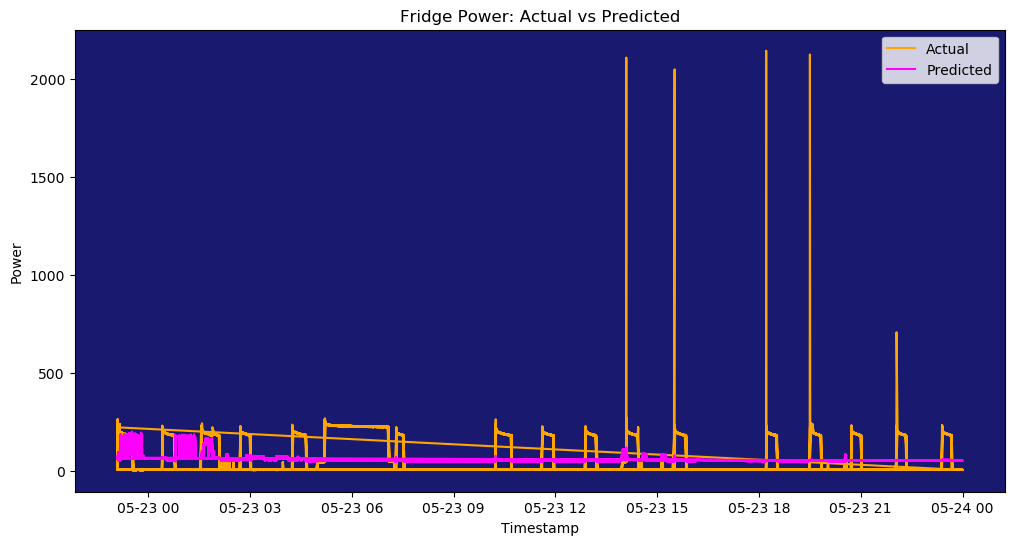

In [19]:
import matplotlib.pyplot as plt

# Extract the actual values and predicted values from the predictions DataFrame
actual_values = predictions_fridge.select(output_cols['fridge']).collect()
predicted_values = predictions_fridge.select('prediction').collect()


timestamps = fridge_test.select('TIMESTAMP').collect()


timestamps = [row['TIMESTAMP'] for row in timestamps]
actual_values = [row[output_cols['fridge']] for row in actual_values]
predicted_values = [row['prediction'] for row in predicted_values]


background_color = 'midnightblue'
actual_color = 'orange'
predicted_color = 'magenta'


plt.figure(figsize=(12, 6))
plt.gca().set_facecolor(background_color)


plt.plot(timestamps, actual_values, label='Actual', color=actual_color)
plt.plot(timestamps, predicted_values, label='Predicted', color=predicted_color)


plt.xlabel('Timestamp')
plt.ylabel('Power')
plt.title('Fridge Power: Actual vs Predicted')
plt.legend()


plt.show()


In [20]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler, MinMaxScaler
from pyspark.ml.evaluation import RegressionEvaluator


# Create vector assembler for input columns
assembler_light = VectorAssembler(inputCols=input_cols['light'], outputCol='features')

# Create scaler
scaler_light = MinMaxScaler(inputCol='features', outputCol='scaled_features')

# Create random forest regressor
lr_light = LinearRegression(featuresCol='scaled_features', labelCol=output_cols['light'], maxIter=50, regParam=0.2)

# Create pipeline
pipeline_light = Pipeline(stages=[assembler_light, scaler_light, lr_light])

# Fit pipeline on train data
pipeline_model_light = pipeline_light.fit(light_train)

# Make predictions on test data
predictions_light = pipeline_model_light.transform(light_test)

# Evaluate the model on the predicted column
evaluator_mse_light = RegressionEvaluator(labelCol=output_cols['light'], predictionCol='prediction', metricName='mse')
mse_light = evaluator_mse_light.evaluate(predictions_light)

evaluator_rmse_light = RegressionEvaluator(labelCol=output_cols['light'], predictionCol='prediction', metricName='rmse')
rmse_light = evaluator_rmse_light.evaluate(predictions_light)

evaluator_mae_light = RegressionEvaluator(labelCol=output_cols['light'], predictionCol='prediction', metricName='mae')
mae_light = evaluator_mae_light.evaluate(predictions_light)

evaluator_r2_light = RegressionEvaluator(labelCol=output_cols['light'], predictionCol='prediction', metricName='r2')
r2_light = evaluator_r2_light.evaluate(predictions_light)

mean_actual = predictions_light.selectExpr(f"avg({output_cols['light']}) as mean_actual").collect()[0]["mean_actual"]
rmae_light = mae_light / mean_actual

# Store the evaluation results
evaluation_results['light'] = {'MSE': mse_light, 'RMSE': rmse_light, 'MAE': mae_light, 'R2': r2_light, 'RMAE': rmae_light}

# Print the evaluation metrics
print("Metrics for light:")
print("MSE:", mse_light)
print("RMSE:", rmse_light)
print("MAE:", mae_light)
print("R2:", r2_light)
print("RMAE:", rmae_light)


23/08/15 03:53:23 WARN TaskSetManager: Stage 126 contains a task of very large size (7657 KiB). The maximum recommended task size is 1000 KiB.
23/08/15 03:53:24 WARN TaskSetManager: Stage 127 contains a task of very large size (1829 KiB). The maximum recommended task size is 1000 KiB.
23/08/15 03:53:30 WARN TaskSetManager: Stage 135 contains a task of very large size (7657 KiB). The maximum recommended task size is 1000 KiB.
23/08/15 03:53:31 WARN TaskSetManager: Stage 136 contains a task of very large size (1829 KiB). The maximum recommended task size is 1000 KiB.
23/08/15 03:53:34 WARN TaskSetManager: Stage 137 contains a task of very large size (7657 KiB). The maximum recommended task size is 1000 KiB.
23/08/15 03:53:35 WARN TaskSetManager: Stage 138 contains a task of very large size (1829 KiB). The maximum recommended task size is 1000 KiB.
23/08/15 03:53:41 WARN TaskSetManager: Stage 143 contains a task of very large size (7657 KiB). The maximum recommended task size is 1000 KiB.

Metrics for light:
MSE: 1618.886159904614
RMSE: 40.23538442595788
MAE: 27.446369327845442
R2: -0.3310007304434306
RMAE: 1.074725326915285


23/08/15 03:54:12 WARN TaskSetManager: Stage 182 contains a task of very large size (7657 KiB). The maximum recommended task size is 1000 KiB.
23/08/15 03:54:13 WARN TaskSetManager: Stage 183 contains a task of very large size (1829 KiB). The maximum recommended task size is 1000 KiB.
23/08/15 03:54:14 WARN TaskSetManager: Stage 187 contains a task of very large size (7657 KiB). The maximum recommended task size is 1000 KiB.
23/08/15 03:54:15 WARN TaskSetManager: Stage 188 contains a task of very large size (1829 KiB). The maximum recommended task size is 1000 KiB.
23/08/15 03:54:17 WARN TaskSetManager: Stage 192 contains a task of very large size (7657 KiB). The maximum recommended task size is 1000 KiB.
23/08/15 03:54:17 WARN TaskSetManager: Stage 193 contains a task of very large size (1829 KiB). The maximum recommended task size is 1000 KiB.


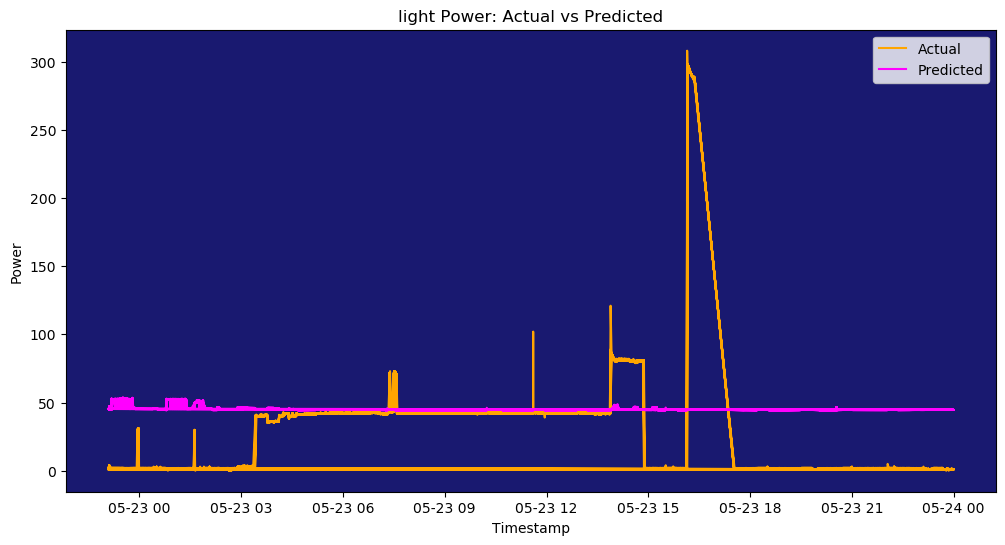

In [21]:
import matplotlib.pyplot as plt

# Extract the actual values and predicted values from the predictions DataFrame
actual_values = predictions_light.select(output_cols['light']).collect()
predicted_values = predictions_light.select('prediction').collect()


timestamps = light_test.select('TIMESTAMP').collect()


timestamps = [row['TIMESTAMP'] for row in timestamps]
actual_values = [row[output_cols['light']] for row in actual_values]
predicted_values = [row['prediction'] for row in predicted_values]


background_color = 'midnightblue'
actual_color = 'orange'
predicted_color = 'magenta'


plt.figure(figsize=(12, 6))
plt.gca().set_facecolor(background_color)


plt.plot(timestamps, actual_values, label='Actual', color=actual_color)
plt.plot(timestamps, predicted_values, label='Predicted', color=predicted_color)


plt.xlabel('Timestamp')
plt.ylabel('Power')
plt.title('light Power: Actual vs Predicted')
plt.legend()


plt.show()
